## Hello there

Načtení dat & inicializace

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from random import sample

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

import CHAID
import math

pd.set_option('mode.chained_assignment',None)

In [273]:
# Import dataset

#JÁRA načtení tam kde to mám uložené
data = pd.read_csv('C:/Users/macou/OneDrive/Dokumenty/ukol1datascience/hw1_devsample.csv', encoding='utf-8')

#FANDOVO načtení dat
#data_all = pd.read_csv('.../hw1_devsample.csv', encoding='utf-8')

print(f'Number of rows:      {data.shape[0]}')
print(f'Number of columns:   {data.shape[1]}')

Number of rows:      80000
Number of columns:   197


In [274]:
#kaggle competitions download -c mff-data-science-2-hw1
#nejde mi to pomoci tohoto nahrát tak jsem to udělal ručně
for col in data.columns:
    print(col)

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APART

hodně sloupců na výběr prediktorů 

In [275]:
for col in data.columns:
    print(col,data[col].dtypes)

SK_ID_CURR int64
TARGET float64
NAME_CONTRACT_TYPE object
CODE_GENDER object
FLAG_OWN_CAR object
FLAG_OWN_REALTY object
CNT_CHILDREN float64
AMT_INCOME_TOTAL float64
AMT_CREDIT float64
AMT_ANNUITY float64
AMT_GOODS_PRICE float64
NAME_TYPE_SUITE object
NAME_INCOME_TYPE object
NAME_EDUCATION_TYPE object
NAME_FAMILY_STATUS object
NAME_HOUSING_TYPE object
REGION_POPULATION_RELATIVE float64
DAYS_BIRTH float64
DAYS_EMPLOYED int64
DAYS_REGISTRATION float64
DAYS_ID_PUBLISH int64
OWN_CAR_AGE float64
FLAG_MOBIL int64
FLAG_EMP_PHONE int64
FLAG_WORK_PHONE int64
FLAG_CONT_MOBILE int64
FLAG_PHONE int64
FLAG_EMAIL int64
OCCUPATION_TYPE object
CNT_FAM_MEMBERS float64
REGION_RATING_CLIENT int64
REGION_RATING_CLIENT_W_CITY int64
WEEKDAY_APPR_PROCESS_START object
HOUR_APPR_PROCESS_START int64
REG_REGION_NOT_LIVE_REGION int64
REG_REGION_NOT_WORK_REGION int64
LIVE_REGION_NOT_WORK_REGION int64
REG_CITY_NOT_LIVE_CITY int64
REG_CITY_NOT_WORK_CITY int64
LIVE_CITY_NOT_WORK_CITY int64
ORGANIZATION_TYPE object
EX

In [276]:
for col in data.columns:
    if data[col].dtypes=="float64":
        a=np.isinf(data[col]).sum()
        print(a)
        print(col)
        
        print(data[col].max())
        print('----------------------')
    
    

0
TARGET
1.0
----------------------
0
CNT_CHILDREN
12.0
----------------------
0
AMT_INCOME_TOTAL
13500000.0
----------------------
0
AMT_CREDIT
4050000.0
----------------------
0
AMT_ANNUITY
225000.0
----------------------
0
AMT_GOODS_PRICE
4050000.0
----------------------
0
REGION_POPULATION_RELATIVE
0.072508
----------------------
0
DAYS_BIRTH
-7489.0
----------------------
0
DAYS_REGISTRATION
0.0
----------------------
0
OWN_CAR_AGE
65.0
----------------------
0
CNT_FAM_MEMBERS
16.0
----------------------
0
EXT_SOURCE_1
0.9439822386623056
----------------------
0
EXT_SOURCE_2
0.8549996664047012
----------------------
0
EXT_SOURCE_3
0.8939760746042866
----------------------
0
APARTMENTS_AVG
1.0
----------------------
0
BASEMENTAREA_AVG
1.0
----------------------
0
YEARS_BEGINEXPLUATATION_AVG
1.0
----------------------
0
YEARS_BUILD_AVG
1.0
----------------------
0
COMMONAREA_AVG
1.0
----------------------
0
ELEVATORS_AVG
1.0
----------------------
0
ENTRANCES_AVG
1.0
---------------

### Zatím vypouštím hodnoty nekonečno nevím jak jinak vyřešit

zatím vyhodím sloupce kde se nachází infinity hodnoty

In [277]:
#sloupce s INF hodnotama
'MEAN_AMTCR_1M_3M_DIV_MEAN_AMTCR_3M_12M','MEAN_AMTCR_1M_3M_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_3M_12M_TYPE_EQ_ACTIVE',
'MEAN_AMTCR_1M_3M_TYPE_EQ_CLOSED_DIV_MEAN_AMTCR_3M_12M_TYPE_EQ_CLOSED','MEAN_AMTCR_OVERDUE_0M_INFM_DIV_MEAN_AMTCR_0M_INFM',
'MEAN_AMTCR_OVERDUE_0M_12M_DIV_MEAN_AMTCR_0M_12M','MEAN_AMTCR_OVERDUE_0M_INFM_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_0M_INFM_TYPE_EQ_ACTIVE',
'MEAN_AMTCR_OVERDUE_0M_12M_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_0M_12M_TYPE_EQ_ACTIVE'

'MEAN_AMTCR_OVERDUE_0M_12M_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_0M_12M_TYPE_EQ_ACTIVE'

In [278]:
for col in data.columns:
    if data[col].dtypes=='object' :
        print(col)
        print(data[col].value_counts())
        print('===================================')
        print('-----------------------------------')
    

NAME_CONTRACT_TYPE
Cash loans         72366
Revolving loans     7634
Name: NAME_CONTRACT_TYPE, dtype: int64
-----------------------------------
CODE_GENDER
F      52488
M      27510
XNA        2
Name: CODE_GENDER, dtype: int64
-----------------------------------
FLAG_OWN_CAR
N    52682
Y    27318
Name: FLAG_OWN_CAR, dtype: int64
-----------------------------------
FLAG_OWN_REALTY
Y    55485
N    24515
Name: FLAG_OWN_REALTY, dtype: int64
-----------------------------------
NAME_TYPE_SUITE
Unaccompanied      64664
Family             10371
Spouse, partner     3033
Children             853
Other_B              436
Other_A              220
Group of people       70
Name: NAME_TYPE_SUITE, dtype: int64
-----------------------------------
NAME_INCOME_TYPE
Working                 41321
Commercial associate    18699
Pensioner               14365
State servant            5602
Student                     8
Unemployed                  4
Businessman                 1
Name: NAME_INCOME_TYPE, dtype: in

U všech typu object se mi zdá nepoužitelný: WEEKDAY_APPR_PROCESS_START, TIME

In [279]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,MEAN_AMTCR_OVERDUE_0M_INFM_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_0M_INFM_TYPE_EQ_ACTIVE,MEAN_AMTCR_OVERDUE_0M_12M_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_0M_12M_TYPE_EQ_ACTIVE,MEAN_AMTCR_OVERDUE_0M_INFM_TYPE_EQ_CLOSED_DIV_MEAN_AMTCR_0M_INFM_TYPE_EQ_CLOSED,MEAN_AMTCR_OVERDUE_0M_12M_TYPE_EQ_CLOSED_DIV_MEAN_AMTCR_0M_12M_TYPE_EQ_CLOSED,FIRST_TRANSACTION_TIME_MONTHS,LAST_TRANSACTION_TIME_MONTHS,TIME,BASE,DAY,MONTH
0,215138,0.0,Cash loans,M,N,Y,0.0,135000.0,646920.0,25195.5,...,0.0,NaN,0.0,NaN,37.0,28.0,2018-06-23,1,20180623,201806
1,325963,0.0,Cash loans,M,Y,Y,0.0,135000.0,740218.5,40284.0,...,0.0,0.0,0.0,NaN,3.0,18.0,2018-06-16,1,20180616,201806
2,206923,0.0,Cash loans,F,N,Y,0.0,180000.0,339241.5,12919.5,...,0.0,NaN,0.0,NaN,73.0,61.0,2018-06-19,1,20180619,201806
3,265855,0.0,Cash loans,F,N,Y,0.0,180000.0,1264428.0,37098.0,...,0.0,0.0,NaN,NaN,36.0,4.0,2018-08-09,1,20180809,201808
4,359795,0.0,Revolving loans,F,N,Y,NaN,76500.0,202500.0,10125.0,...,NaN,NaN,0.0,0.0,12.0,12.0,2018-11-13,1,20181113,201811


 zdá se že chybějící NaN hodnoty budou jen u CNT_children

# CART metoda

In [280]:
data_cart = data.copy()

In [281]:
data_cart.isna().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
                                ...  
LAST_TRANSACTION_TIME_MONTHS    30353
TIME                                0
BASE                                0
DAY                                 0
MONTH                               0
Length: 197, dtype: int64

In [282]:
data_cart["CNT_CHILDREN"].value_counts()


0.0     41680
1.0      9352
2.0      3562
3.0       399
4.0        32
5.0         6
6.0         1
12.0        1
10.0        1
8.0         1
Name: CNT_CHILDREN, dtype: int64

In [283]:
target="TARGET"

predictors_cat=list(data_cart.columns[[data_cart[col].dtype == 'object' for col in data_cart.columns]])
predictors_num = list(data_cart.columns[[data_cart[col].dtype != 'object' for col in data_cart.columns]])
predictors_num.remove(target)

In [284]:
predictors_cat.remove('TIME')

In [287]:
predictors_num.remove('SK_ID_CURR')
predictors_num.remove('BASE')
predictors_num.remove('DAY')
predictors_num.remove('MONTH')
predictors_num.remove('MEAN_AMTCR_1M_3M_DIV_MEAN_AMTCR_3M_12M')
predictors_num.remove('MEAN_AMTCR_1M_3M_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_3M_12M_TYPE_EQ_ACTIVE')
predictors_num.remove('MEAN_AMTCR_1M_3M_TYPE_EQ_CLOSED_DIV_MEAN_AMTCR_3M_12M_TYPE_EQ_CLOSED')
predictors_num.remove('MEAN_AMTCR_OVERDUE_0M_INFM_DIV_MEAN_AMTCR_0M_INFM')
predictors_num.remove('MEAN_AMTCR_OVERDUE_0M_12M_DIV_MEAN_AMTCR_0M_12M')
predictors_num.remove('MEAN_AMTCR_OVERDUE_0M_INFM_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_0M_INFM_TYPE_EQ_ACTIVE')
predictors_num.remove('MEAN_AMTCR_OVERDUE_0M_12M_TYPE_EQ_ACTIVE_DIV_MEAN_AMTCR_0M_12M_TYPE_EQ_ACTIVE')

ValueError: list.remove(x): x not in list

In [288]:
data_cart=data_cart.fillna(data_cart.mean())

In [289]:
predictors_num

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXP

In [290]:
def mean_target_encoding(data, predictor, target, alpha = 0.01):
    
    """
    - Args:
        data: dataset
        predictor: column name for predictor in data to be encoded
        target: column name for target
        alpha: parameter in mean-target-encoding (float)
        
    - Returns:
        Dict: key = category in 'predictor', value = encoded category based on 'target' using mean-target encoding with parameter 'alpha'
    """
    
    #data[predictor] = data[predictor].fillna("MISSING")
    
    # TODO: Create dataframe category that contains at least two columns:
    # column predictor (use the parameter of the function) contains unique category values for given predictor
    # column 'encoding' contains mean-target-encoding for given category computed as above
    # Keep in mind, that whenever you apply 'groupby' you have to specify 'dropna'=False to keep also observations with missing values
    
    mean_target_total = np.mean(data[target]) #(TODO)
    count_total = len(data) #(TODO)
    
    category = data.groupby(predictor, dropna=False).agg( #(TODO)
        mean_target = (target, np.mean),
        count = (target, len)
    )
    
    category['frequency'] = category['count'] / count_total #(TODO)
    category['encoding'] = (category['frequency'] * category['mean_target'] + alpha * mean_target_total) / (category['frequency'] + alpha) #(TODO)
    
    # Create dictionary storing our encoding
    encoding = dict(zip(category.index,category['encoding']))
    
    return encoding


In [291]:
predictors_mean_target = []
encodings = {}
for pred in predictors_cat:
    
    # New predictor name contains 'MT' and former predictor name
    pred_mean_target = pred + "MT"
    
    # TODO: First, compute the encoding for given predictor. Then apply using 'replace' method
    # that works on data frames and store values to 'data_forest[pred_mean_target]'
    
    encodings[pred_mean_target] = mean_target_encoding(data_cart, pred, target) #(TODO)
    data_cart[pred_mean_target] = data_cart[pred].replace(encodings[pred_mean_target]) #(TODO)
    
    # Keep new predictors names
    predictors_mean_target = predictors_mean_target + [pred_mean_target]

ONE HOT ENCODING

In [292]:
# One-hot encoding. Names of columns of new columns will be stored in 'predictors_one_hot'

predictors_one_hot = []
for pred in predictors_cat:
    
    # TODO: Use pd.get_dummies to encode categorical predictors. Store the result to 'data_one_hot' dataframe
    # (only columns containing encoded values)
    data_one_hot = pd.get_dummies(data_cart[pred]) #(TODO)
    data_one_hot.columns = [pred+col for col in data_one_hot.columns] #(TODO)
    
    # Join to data
    data_cart = pd.concat([data_cart, data_one_hot], axis=1)
    
    # Keep new predictors names
    predictors_one_hot = predictors_one_hot + list(data_one_hot.columns)
    


In [293]:
len(predictors_one_hot+predictors_num)

306

In [294]:
X_train_oh, X_test_oh, y_train_oh, y_test_oh = train_test_split(
    data_cart[predictors_num+predictors_one_hot], data_cart[target], test_size=0.2, random_state=17
)

In [295]:
print(sum(data_cart[predictors_one_hot].isna().sum()))

0


In [296]:
sum(X_train_oh.isna().sum())

0

In [297]:
np.isinf(X_train_oh).sum()

CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                       0
AMT_GOODS_PRICE                   0
                                 ..
WALLSMATERIAL_MODEPanel           0
WALLSMATERIAL_MODEStone, brick    0
WALLSMATERIAL_MODEWooden          0
EMERGENCYSTATE_MODENo             0
EMERGENCYSTATE_MODEYes            0
Length: 306, dtype: int64

data split

In [298]:
X_train_mt, X_test_mt, y_train_mt, y_test_mt = train_test_split(
    data_cart[predictors_num+predictors_mean_target], data_cart[target], test_size=0.2, random_state=17
)

In [299]:
print(sum(data_cart[predictors_num].isna().sum()))

0


In [300]:
data_cart.dtypes

SK_ID_CURR                          int64
TARGET                            float64
NAME_CONTRACT_TYPE                 object
CODE_GENDER                        object
FLAG_OWN_CAR                       object
                                   ...   
WALLSMATERIAL_MODEPanel             uint8
WALLSMATERIAL_MODEStone, brick      uint8
WALLSMATERIAL_MODEWooden            uint8
EMERGENCYSTATE_MODENo               uint8
EMERGENCYSTATE_MODEYes              uint8
Length: 351, dtype: object

## ROZDĚLENÍ NA  TRAIN  & TEST DATASET

In [301]:
pd.to_datetime(data['TIME'])

0       2018-06-23
1       2018-06-16
2       2018-06-19
3       2018-08-09
4       2018-11-13
           ...    
79995   2018-04-20
79996   2018-09-08
79997   2018-02-15
79998   2018-06-27
79999   2018-05-16
Name: TIME, Length: 80000, dtype: datetime64[ns]

In [302]:
data_cart['MONTH'] = pd.to_datetime(data['TIME']).dt.month
data_cart['MONTH'].value_counts()

12    6892
1     6809
3     6805
5     6772
10    6745
6     6693
8     6664
9     6643
7     6629
11    6583
4     6511
2     6254
Name: MONTH, dtype: int64

In [303]:
criterion = 'gini' #(TODO)
splitter = 'best' #(TODO)
mdepth = 5 #(TODO)
min_samples_split = 40 #(TODO)
min_samples_leaf = 0.001 #(TODO)
minleaf = 30 #(TODO)
random_state = 17

# Now we contruct the model.
model_mt = tree.DecisionTreeClassifier(
    criterion=criterion,
    splitter=splitter, 
    max_depth=mdepth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf, 
    random_state=random_state, 
)

# And fit training data.

clf = model_mt.fit(X_train_mt, y_train_mt) #(TODO)

ONE hOT ENCODING FITT

In [304]:
criterion = 'gini' #(TODO)
splitter = 'best' #(TODO)
mdepth = 5 #(TODO)
min_samples_split = 40 #(TODO)
min_samples_leaf = 0.001 #(TODO)
minleaf = 30 #(TODO)
random_state = 17

# Now we contruct the model.
model_oh = tree.DecisionTreeClassifier(
    criterion=criterion,
    splitter=splitter, 
    max_depth=mdepth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf, 
    random_state=random_state, 
)

# And fit training data.

clf = model_oh.fit(X_train_oh, y_train_oh) #(TODO)

### aktualne pouzivam one hot

In [305]:
# Predict class labels on training data
pred_labels_tr = model_oh.predict(X_train_oh)
# Predict class labels on a test data
pred_labels_te = model_oh.predict(X_test_oh)


In [306]:
# Tree summary and model evaluation metrics
print('*************** Tree Summary ***************')
print('Classes: ', clf.classes_)
print('Tree Depth: ', clf.tree_.max_depth)
print('No. of leaves: ', clf.tree_.n_leaves)
print('No. of features: ', clf.n_features_)
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Test Data ***************')
score_te = model_oh.score(X_test_oh, y_test_oh)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model
print(classification_report( y_test_oh, pred_labels_te))
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Training Data ***************')
score_tr = model_oh.score( X_train_oh, y_train_oh)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model
print(classification_report(y_train_oh, pred_labels_tr))
print('--------------------------------------------------------')

*************** Tree Summary ***************
Classes:  [0. 1.]
Tree Depth:  5
No. of leaves:  32
No. of features:  306
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.919375
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     14717
         1.0       0.32      0.00      0.01      1283

    accuracy                           0.92     16000
   macro avg       0.62      0.50      0.48     16000
weighted avg       0.87      0.92      0.88     16000

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.91990625
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     58867
         1.0       0.55      0.01      0.01      5133

    accuracy                           0.92     64000
   macro avg       0.74      0.50      0.49     64

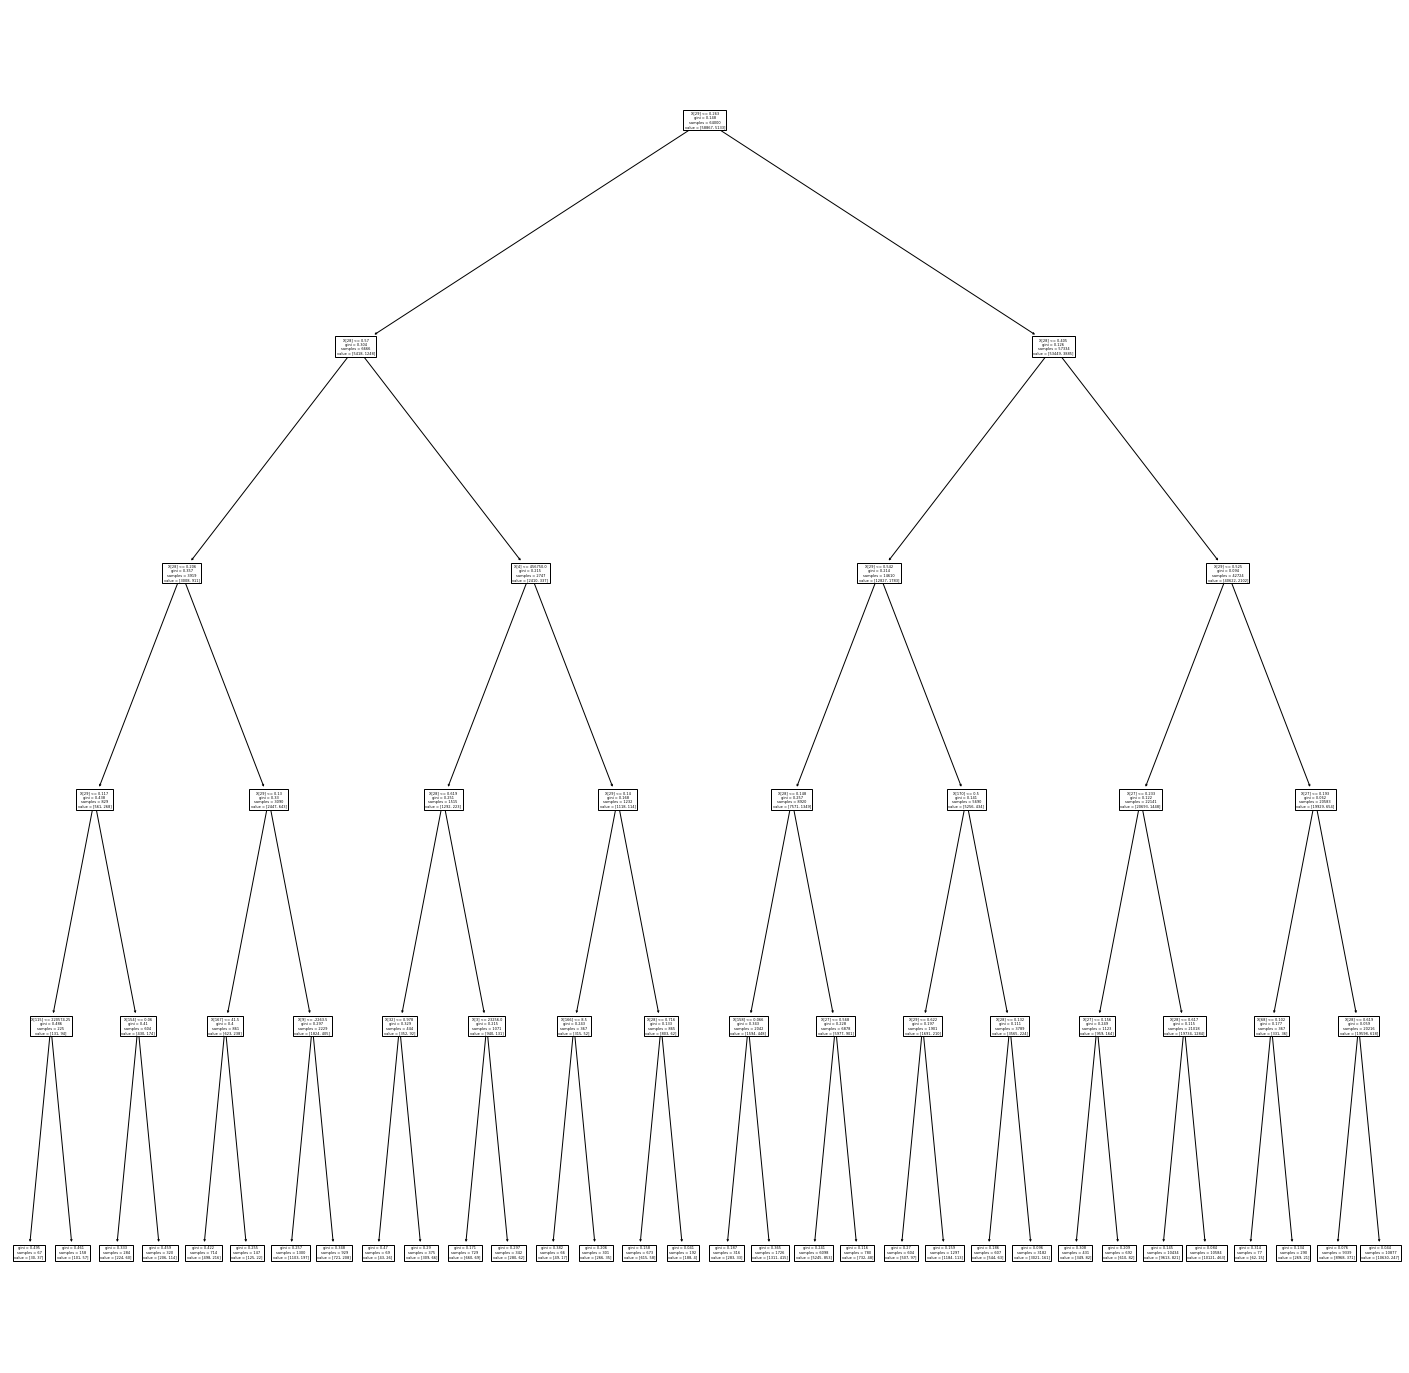

In [307]:
fig, ax = plt.subplots(figsize=(25, 25))
tree.plot_tree(clf, ax=ax)
plt.show()

Nějak to furt predikuje nuly tak mi to je divné 

In [308]:
# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(predictors, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

NameError: name 'predictors' is not defined

In [ ]:
# Plot importance
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, predictors, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

### tady pouzivam mean encoding

In [309]:
# Predict class labels on training data
pred_labels_tr = model_mt.predict(X_train_mt)
# Predict class labels on a test data
pred_labels_te = model_mt.predict(X_test_mt)

In [310]:
# Tree summary and model evaluation metrics
print('*************** Tree Summary ***************')
print('Classes: ', clf.classes_)
print('Tree Depth: ', clf.tree_.max_depth)
print('No. of leaves: ', clf.tree_.n_leaves)
print('No. of features: ', clf.n_features_)
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Test Data ***************')
score_te = model_mt.score(X_test_mt, y_test_mt)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model
print(classification_report( y_test_mt, pred_labels_te))
print('--------------------------------------------------------')
print("")

print('*************** Evaluation on Training Data ***************')
score_tr = model_mt.score( X_train_mt, y_train_mt)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model
print(classification_report(y_train_mt, pred_labels_tr))
print('--------------------------------------------------------')

*************** Tree Summary ***************
Classes:  [0. 1.]
Tree Depth:  5
No. of leaves:  32
No. of features:  306
--------------------------------------------------------

*************** Evaluation on Test Data ***************
Accuracy Score:  0.9198125
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     14717
         1.0       0.00      0.00      0.00      1283

    accuracy                           0.92     16000
   macro avg       0.46      0.50      0.48     16000
weighted avg       0.85      0.92      0.88     16000

--------------------------------------------------------

*************** Evaluation on Training Data ***************
Accuracy Score:  0.919796875
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     58867
         1.0       0.00      0.00      0.00      5133

    accuracy                           0.92     64000
   macro avg       0.46      0.50      0.48     

C:\Users\macou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\macou\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Zde si jen zkouším co by to predikovalo na těch odevzdávacích datech {JÁRA}

In [334]:
data_finalvalid= pd.read_csv('C:/Users/macou/OneDrive/Dokumenty/ukol1datascience/hw1_outofsample.csv', encoding='utf-8')

In [335]:
for col in predictors_num:
    if data_finalvalid[col].dtypes=="float64":
        a=np.isinf(data_finalvalid[col]).sum()
        print(a)
        print(col)
        
        print(data_finalvalid[col].max())
        print('----------------------')
    
    

0
CNT_CHILDREN
7.0
----------------------
0
AMT_INCOME_TOTAL
4500000.0
----------------------
0
AMT_CREDIT
4050000.0
----------------------
0
AMT_ANNUITY
225000.0
----------------------
0
AMT_GOODS_PRICE
4050000.0
----------------------
0
REGION_POPULATION_RELATIVE
0.072508
----------------------
0
DAYS_BIRTH
-7689.0
----------------------
0
DAYS_REGISTRATION
0.0
----------------------
0
OWN_CAR_AGE
65.0
----------------------
0
CNT_FAM_MEMBERS
9.0
----------------------
0
EXT_SOURCE_1
0.9419858745171088
----------------------
0
EXT_SOURCE_2
0.8549996664047012
----------------------
0
EXT_SOURCE_3
0.8825303127941461
----------------------
0
APARTMENTS_AVG
1.0
----------------------
0
BASEMENTAREA_AVG
1.0
----------------------
0
YEARS_BEGINEXPLUATATION_AVG
1.0
----------------------
0
YEARS_BUILD_AVG
1.0
----------------------
0
COMMONAREA_AVG
1.0
----------------------
0
ELEVATORS_AVG
1.0
----------------------
0
ENTRANCES_AVG
1.0
----------------------
0
FLOORSMAX_AVG
1.0
-----------

In [337]:


for pred in predictors_cat:
    
    # TODO: Use pd.get_dummies to encode categorical predictors. Store the result to 'data_one_hot' dataframe
    # (only columns containing encoded values)
    data_one_hot = pd.get_dummies(data_finalvalid[pred]) #(TODO)
    data_one_hot.columns = [pred+col for col in data_one_hot.columns] #(TODO)
    
    # Join to data
    data_finalvalid = pd.concat([data_finalvalid, data_one_hot], axis=1)
    
   
    


In [338]:
for col in data_finalvalid.columns:
    print(col)

SK_ID_CURR
NAME_CONTRACT_TYPE
CODE_GENDER
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
FLAG_MOBIL
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
OCCUPATION_TYPE
CNT_FAM_MEMBERS
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_M

In [340]:
len(predictors_one_hot)

138

# tady pozorujeme v dummy variables něco co jsme nepozorovali v train datasetu takže proto to nefunguje 

In [341]:
prediction_final = model_oh.predict(data_finalvalid[predictors_num+predictors_one_hot])

KeyError: "['ORGANIZATION_TYPEIndustry: type 8', 'CODE_GENDERXNA', 'NAME_INCOME_TYPEStudent', 'NAME_INCOME_TYPEBusinessman'] not in index"

In [219]:
i=0
for col in predictors_num+predictors_one_hot:
    i=i+1
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [221]:
X_train_oh.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'HOUSETYPE_MODEterraced house', 'WALLSMATERIAL_MODEBlock',
       'WALLSMATERIAL_MODEMixed', 'WALLSMATERIAL_MODEMonolithic',
       'WALLSMATERIAL_MODEOthers', 'WALLSMATERIAL_MODEPanel',
       'WALLSMATERIAL_MODEStone, brick', 'WALLSMATERIAL_MODEWooden',
       'EMERGENCYSTATE_MODENo', 'EMERGENCYSTATE_MODEYes'],
      dtype='object', length=306)

In [215]:
for col in data_finalvalid.columns:
    if data_finalvalid[col].dtypes=="float64":
        a=np.isinf(data_finalvalid[col]).sum()
        print(a)
        print(col)
        
        print(data_finalvalid[col].max())
        print('----------------------')
    
    

0
CNT_CHILDREN
7.0
----------------------
0
AMT_INCOME_TOTAL
4500000.0
----------------------
0
AMT_CREDIT
4050000.0
----------------------
0
AMT_ANNUITY
225000.0
----------------------
0
AMT_GOODS_PRICE
4050000.0
----------------------
0
REGION_POPULATION_RELATIVE
0.072508
----------------------
0
DAYS_BIRTH
-7689.0
----------------------
0
DAYS_REGISTRATION
0.0
----------------------
0
OWN_CAR_AGE
65.0
----------------------
0
CNT_FAM_MEMBERS
9.0
----------------------
0
EXT_SOURCE_1
0.9419858745171088
----------------------
0
EXT_SOURCE_2
0.8549996664047012
----------------------
0
EXT_SOURCE_3
0.8825303127941461
----------------------
0
APARTMENTS_AVG
1.0
----------------------
0
BASEMENTAREA_AVG
1.0
----------------------
0
YEARS_BEGINEXPLUATATION_AVG
1.0
----------------------
0
YEARS_BUILD_AVG
1.0
----------------------
0
COMMONAREA_AVG
1.0
----------------------
0
ELEVATORS_AVG
1.0
----------------------
0
ENTRANCES_AVG
1.0
----------------------
0
FLOORSMAX_AVG
1.0
-----------

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [193]:
prediction_final.sum()

0.0